In [168]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [169]:

# Step 2: Load dataset
housing = fetch_california_housing(as_frame=True)
data1 = pd.read_csv('housing.csv')
data = pd.DataFrame(data1)
data['MedHouseVal'] = housing.target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   MedHouseVal  
0        4.526  
1        3.585  
2        3.521  


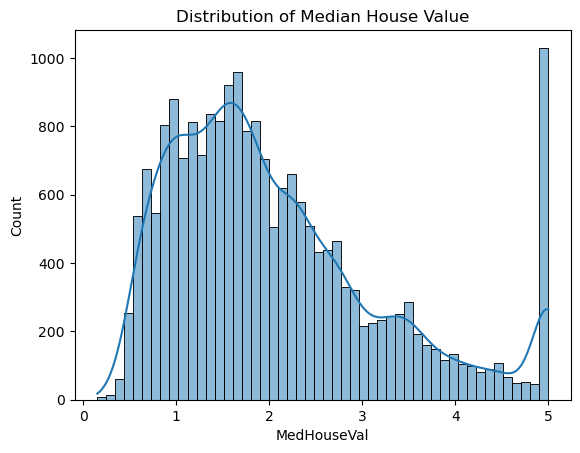

In [170]:

# Step 3: Data exploration (optional but good for understanding)
print(data.head())
print(data.describe())
sns.histplot(data['MedHouseVal'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()


In [171]:
ndata = data.drop('ocean_proximity',axis=1)

In [172]:
imputer = SimpleImputer(strategy='median')
imputer.fit(ndata)

SimpleImputer(strategy='median')

In [173]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  1.7970e+00])

In [174]:
x = ndata.drop("MedHouseVal", axis=1)
y = ndata["MedHouseVal"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [175]:
imputer.transform(data.drop('ocean_proximity', axis=1))


array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  8.3252e+00,
         4.5260e+05,  4.5260e+00],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  8.3014e+00,
         3.5850e+05,  3.5850e+00],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  7.2574e+00,
         3.5210e+05,  3.5210e+00],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  1.7000e+00,
         9.2300e+04,  9.2300e-01],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  1.8672e+00,
         8.4700e+04,  8.4700e-01],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  2.3886e+00,
         8.9400e+04,  8.9400e-01]], shape=(20640, 10))

In [176]:
housing_cat = data[['ocean_proximity']]
housing_cat.tail(10)

,ocean_proximity
20630,INLAND
20631,INLAND
20632,INLAND
20633,INLAND
20634,INLAND
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND
20639,INLAND


In [177]:
from sklearn.preprocessing import OrdinalEncoder
OrdinalEncoder = OrdinalEncoder()
housing_cat_encoder = OrdinalEncoder.fit_transform(housing_cat)
housing_cat_encoder[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [178]:
OrdinalEncoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [179]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [180]:
housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

In [181]:
# Step 5: Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [182]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("lin_reg", LinearRegression())
])

pipeline.fit(ndata , ndata["MedHouseVal"])


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('lin_reg', LinearRegression())])

In [183]:
ndata_df = pd.DataFrame(imputer.transform(ndata),columns=ndata.columns)

In [185]:
ndata

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,MedHouseVal
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4.526
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.585
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.521
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.413
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.781
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.771
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.923
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.847


In [184]:
prediction = lin_reg.predict(ndata)
print(prediction[:5])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- MedHouseVal


In [ ]:

# Step 6: Make predictions

y_pred = lin_reg.predict(x_test)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.4f}")


In [ ]:

# Step 4: Train-test split

# Optional: Show predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([0, 5], [0, 5], 'r')
plt.grid(True)
plt.show()
